In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import klib
import seaborn as sns
import pandoc

In [2]:
app = pd.read_csv('application_data.csv')

In [3]:
app.shape

(307511, 122)

In [4]:
app.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
46759,154163,0,Revolving loans,F,N,Y,2,135000.0,360000.0,18000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,7.0
234352,371465,0,Cash loans,M,Y,N,0,270000.0,1695483.0,49702.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
245031,383609,0,Cash loans,F,Y,Y,0,162000.0,1515415.5,41800.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
191290,321796,0,Cash loans,F,Y,N,0,135000.0,277969.5,18225.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
202383,334612,0,Cash loans,F,N,N,0,405000.0,1428408.0,75519.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
165513,291869,0,Cash loans,M,Y,N,0,180000.0,900000.0,43429.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
170222,297284,0,Cash loans,F,N,Y,0,81000.0,416052.0,15813.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,9.0
21884,125493,0,Cash loans,F,Y,N,2,135000.0,553806.0,23593.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,5.0
145590,268812,0,Cash loans,F,Y,Y,0,247500.0,711612.0,20934.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,8.0
12074,114083,1,Cash loans,F,N,N,2,225000.0,1339884.0,39307.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


# Feature Selection

In [5]:
missing_info = pd.DataFrame(app.isnull().sum().reset_index())

In [6]:
missing_info.rename(columns = {'index':'col_name', 0 : 'null_count'}, inplace = True)
missing_info.sample(5)

,col_name,null_count
49,ELEVATORS_AVG,163891
84,NONLIVINGAPARTMENTS_MEDI,213514
3,CODE_GENDER,0
19,DAYS_REGISTRATION,0
59,BASEMENTAREA_MODE,179943


In [7]:
missing_info['per_of_missing'] = missing_info['null_count']/app.shape[0]*100

In [8]:
missing_info
missing_info.to_excel(r"missing_info.xlsx", index = True)
missing_info

,col_name,null_count,per_of_missing
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


In [9]:
missing_cols = missing_info[missing_info['per_of_missing']>=40]['col_name'].tolist()
app_missing_rvm = app.drop(labels = missing_cols, axis = 1)

In [177]:
missing_cols

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [10]:
app_missing_rvm.shape

(307511, 73)

In [11]:
app_missing_rvm.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35618,141248,0,Cash loans,M,Y,Y,0,81000.0,76410.0,8154.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
123377,243073,0,Cash loans,M,N,Y,0,171000.0,1451047.5,60012.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
235853,373188,0,Cash loans,F,N,Y,1,202500.0,848745.0,43465.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
235484,372761,0,Cash loans,F,N,Y,0,270000.0,900000.0,50386.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
58442,167743,0,Cash loans,F,N,Y,1,135000.0,373311.0,19188.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
62518,172503,0,Cash loans,F,N,Y,0,90000.0,227520.0,8577.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
37593,143544,0,Cash loans,F,N,Y,2,157500.0,1078200.0,31653.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
257713,398230,0,Cash loans,M,Y,Y,0,157500.0,263686.5,15268.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
248455,387462,0,Cash loans,M,Y,Y,0,270000.0,765000.0,40887.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
7534,108784,0,Cash loans,F,N,Y,0,157500.0,675000.0,32602.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
flag_col = []

# iNDENTIFYING THE COLUMNS WHICH ARE A FLAG COLUMNS
for i in app_missing_rvm.columns:
    if i.startswith('FLAG_'):
        flag_col.append(i)
len(flag_col)

28

In [13]:
app_missing_rvm[flag_col].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
flag_target = app_missing_rvm[flag_col + ['TARGET']].head()

<AxesSubplot:xlabel='FLAG_WORK_PHONE', ylabel='count'>

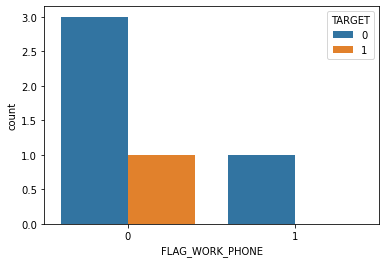

In [15]:
sns.countplot(data = flag_target, x = 'FLAG_WORK_PHONE', hue = 'TARGET')

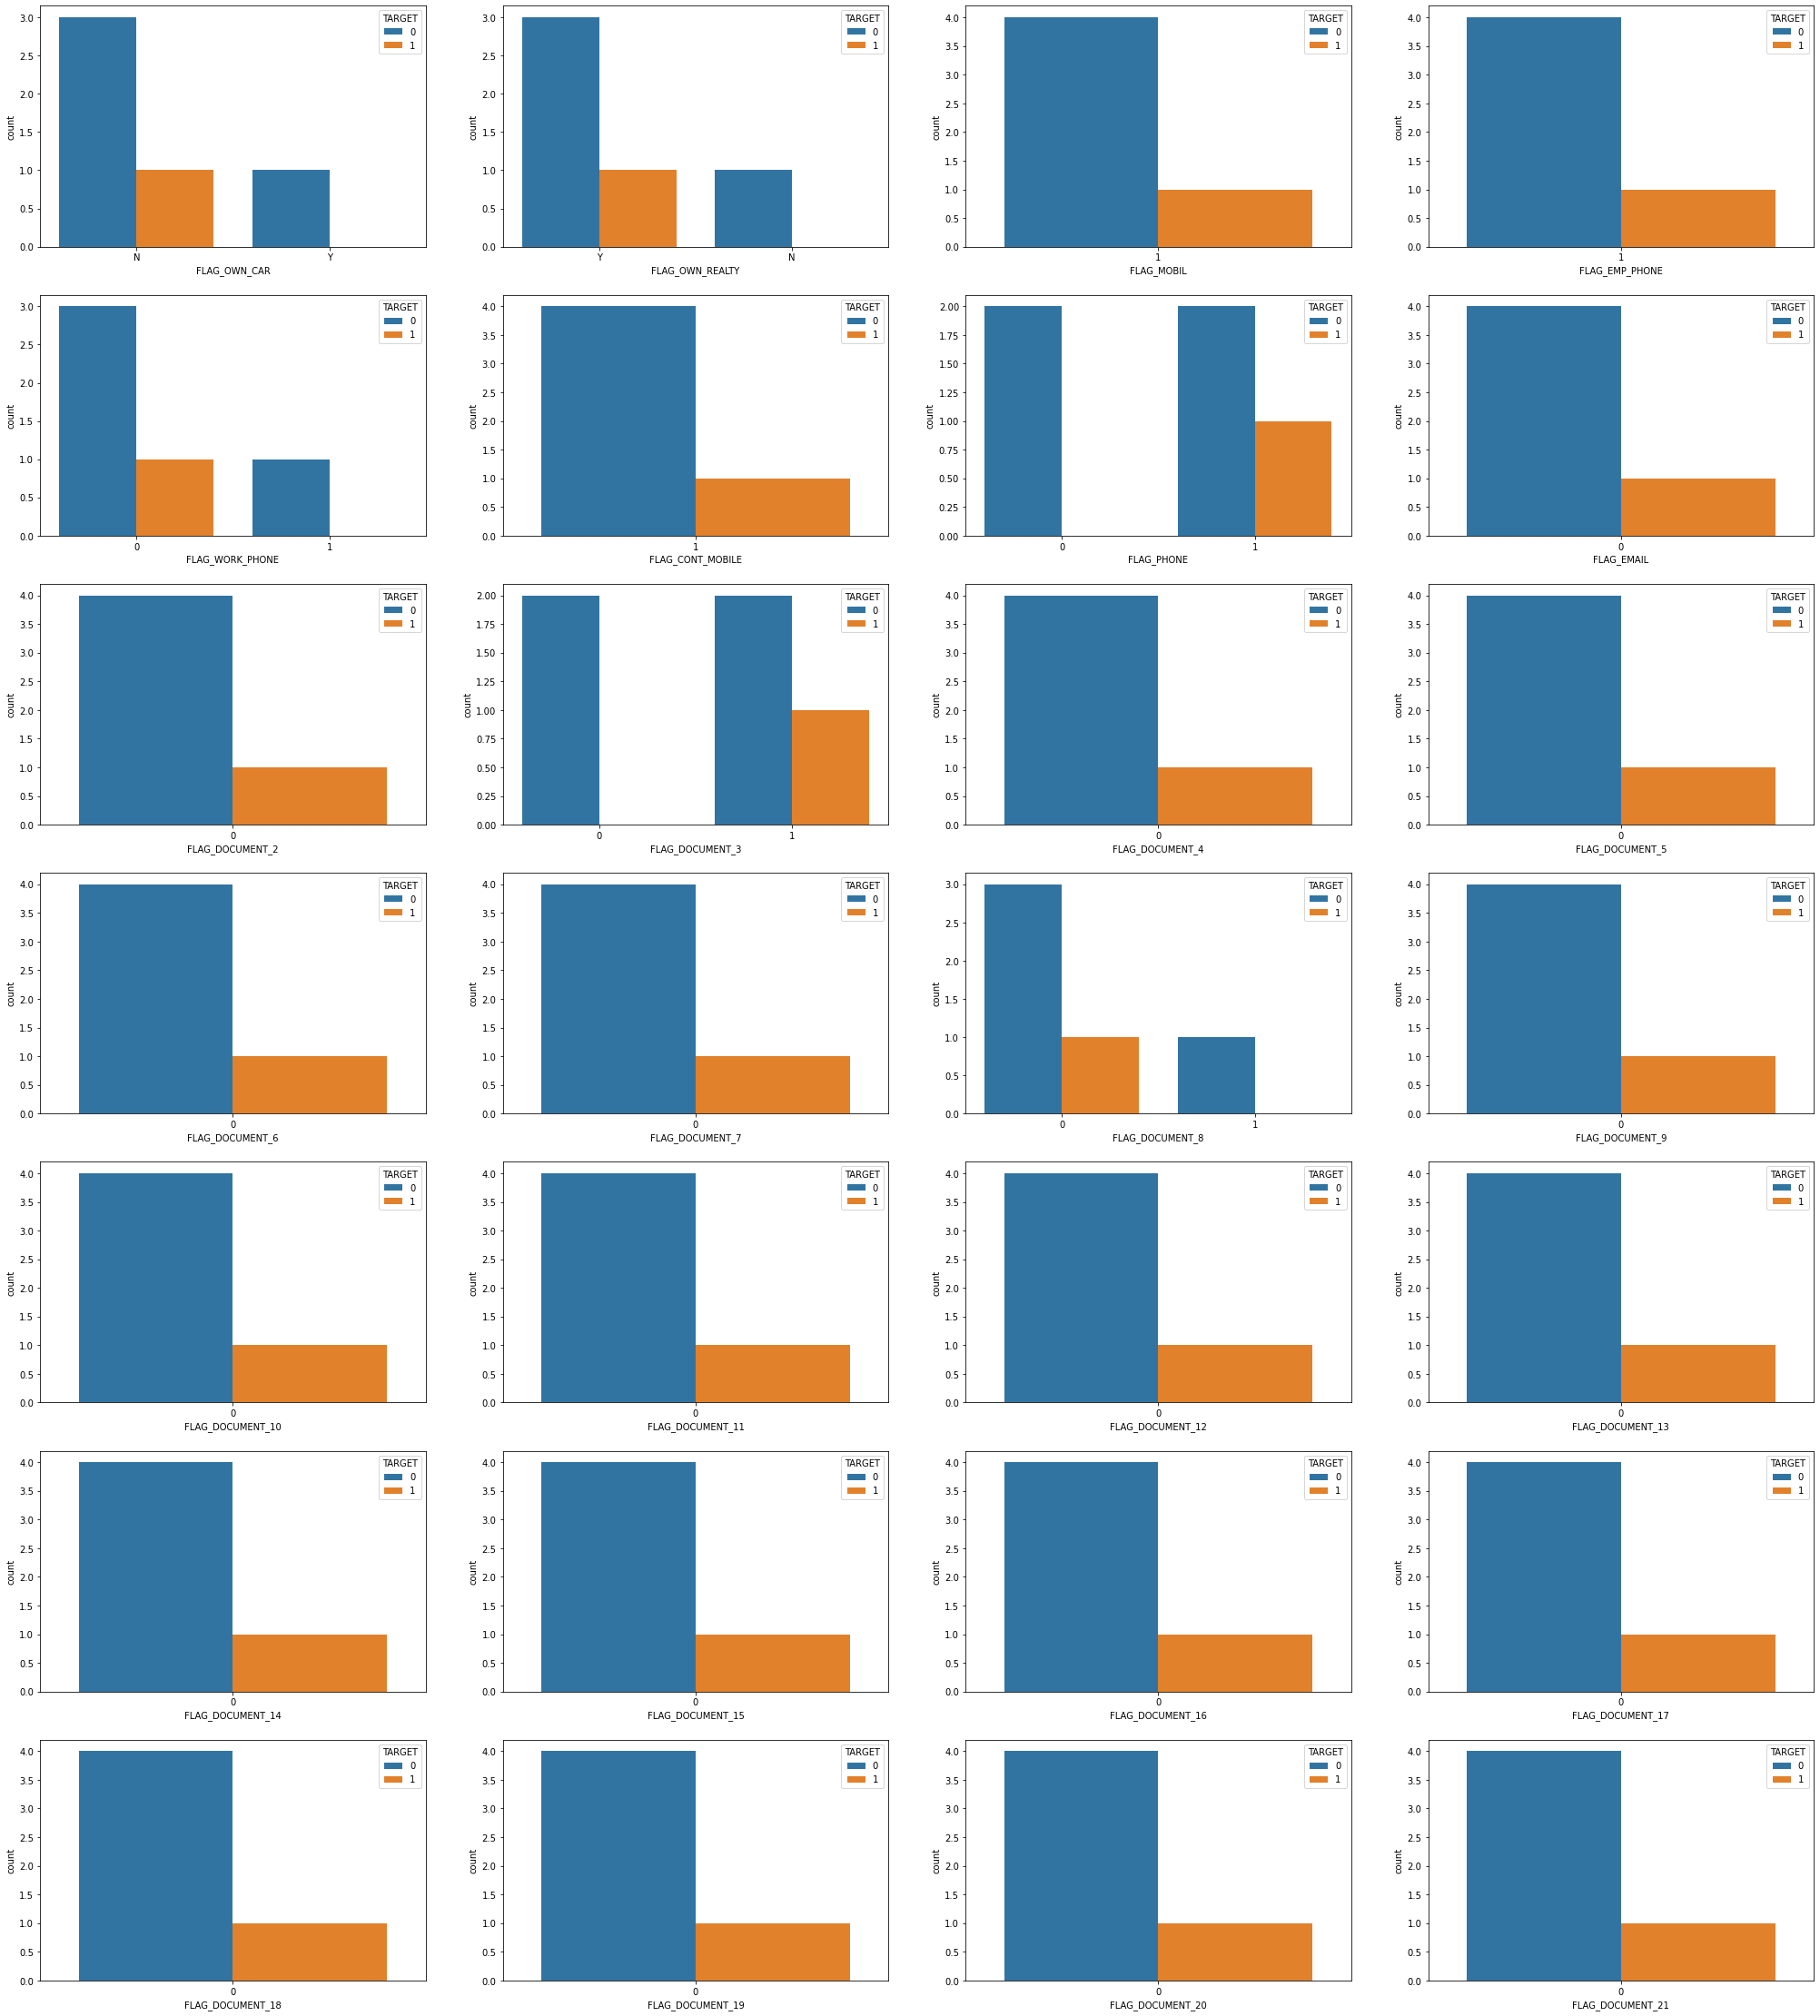

In [16]:
plt.figure(figsize = (35,40))
for i,col in enumerate(flag_col):
    plt.subplot(7,4, i+1)
    sns.countplot(data = flag_target, x = col, hue = 'TARGET')

In [17]:
flag_corr =['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
'FLAG_EMAIL', 'TARGET']

In [18]:
flag_corr
flag_corr_df = app_missing_rvm[flag_corr]
corr_df = round(flag_corr_df.corr(),2)

In [19]:
flag_corr_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [20]:
flag_corr

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'TARGET']

In [21]:
flag_corr_df.replace({'N':0,"Y":1}, inplace = True)
flag_corr_df.replace({'N':0, 'Y':1},inplace = True)

C:\Users\krishnendu\AppData\Local\Temp\ipykernel_23432\194663553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df.replace({'N':0,"Y":1}, inplace = True)
C:\Users\krishnendu\AppData\Local\Temp\ipykernel_23432\194663553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df.replace({'N':0, 'Y':1},inplace = True)


In [22]:
corr_df = round(flag_corr_df.corr(),2)

In [23]:
flag_corr_df.sample(10)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
58127,1,0,1,1,0,1,0,0,0
117688,0,1,1,1,0,1,0,0,0
70956,1,0,1,1,1,1,0,0,0
92890,1,0,1,1,1,1,0,0,0
87105,0,1,1,1,0,1,1,0,0
147003,0,1,1,1,0,1,0,1,0
103782,0,1,1,0,0,1,1,0,0
215374,1,1,1,1,0,1,0,0,1
159157,0,1,1,1,0,1,0,0,0
249805,0,1,1,1,0,1,0,0,0


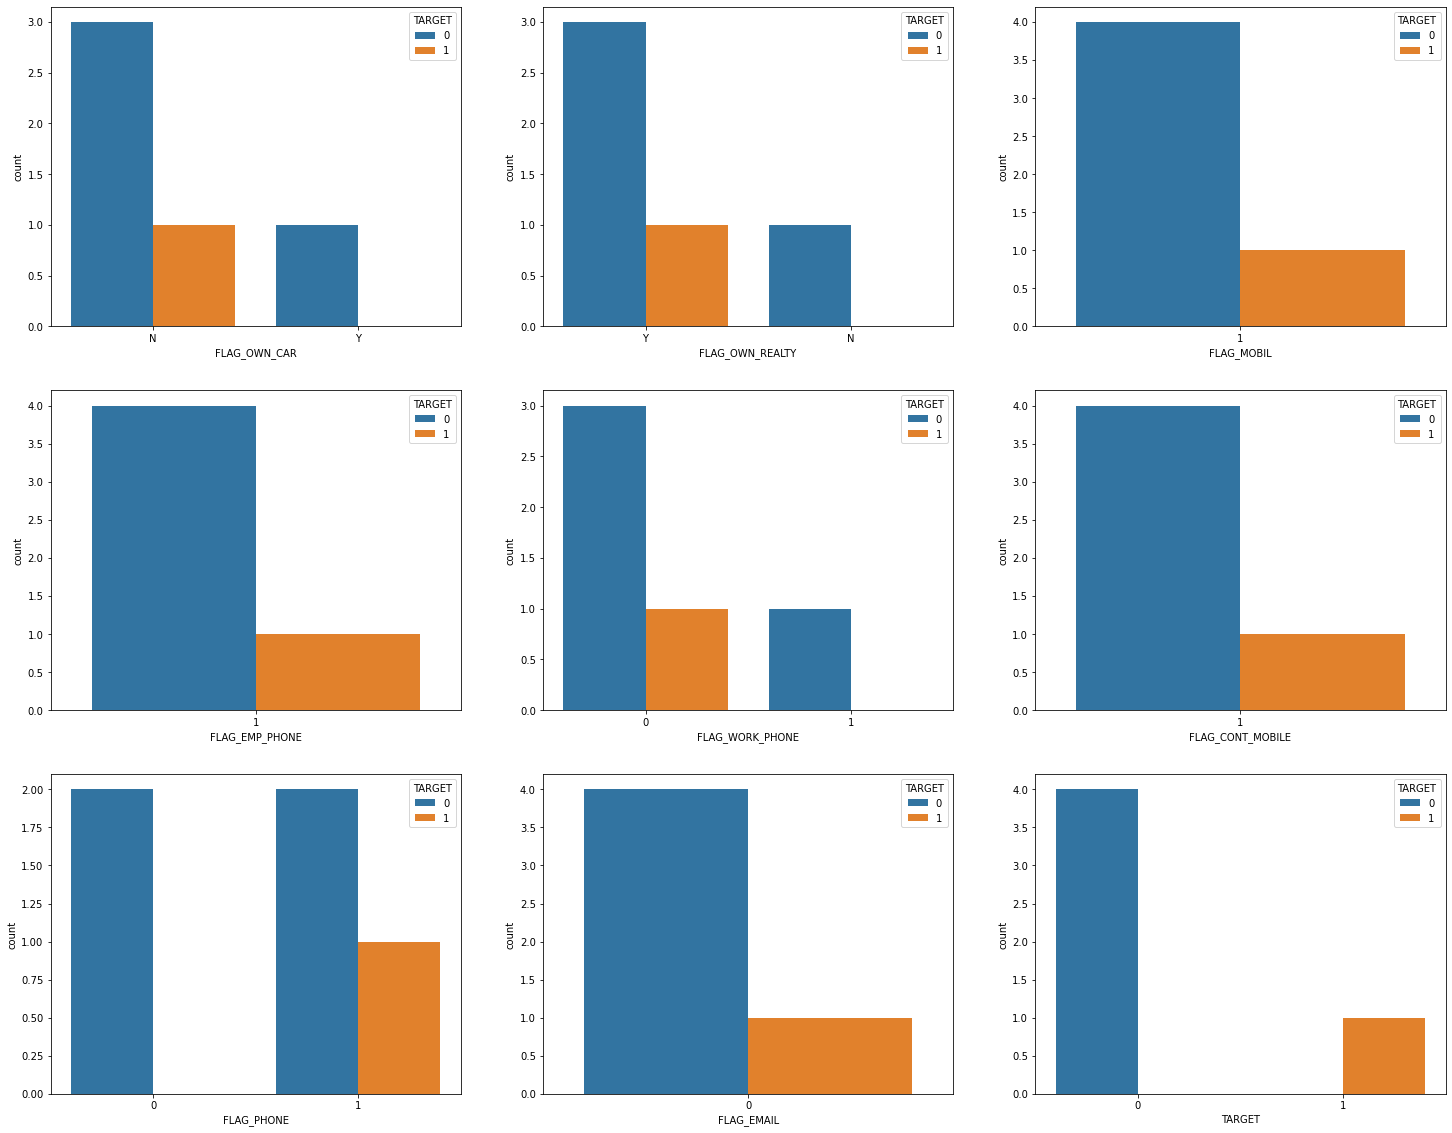

In [24]:
plt.figure(figsize = (25,20))

for i,col in enumerate(flag_corr):
    plt.subplot(3,3,i+1)
    sns.countplot(data = flag_target, x = col , hue = 'TARGET')

<AxesSubplot:>

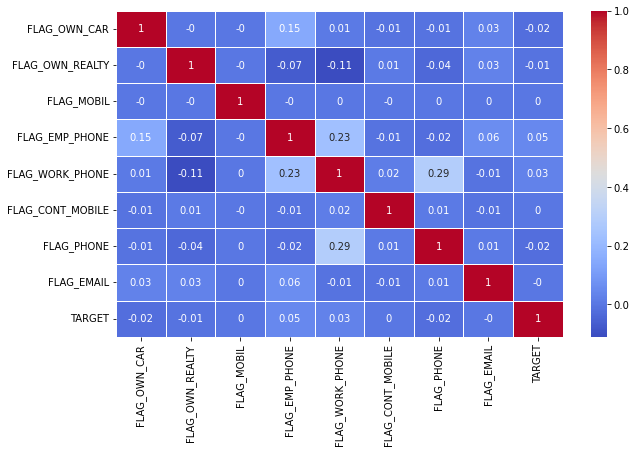

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_df, cmap = 'coolwarm', linewidth = 0.5, annot = True)

In [26]:
app_flag_rmvd = app_missing_rvm.drop(labels = flag_col, axis = 1)

In [27]:
app_flag_rmvd.shape

(307511, 45)

In [28]:
app_flag_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
app_flag_rmvd.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_R

In [30]:
ex_score_df = app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]
corr_ex_score = round(ex_score_df.corr(),2)

<AxesSubplot:>

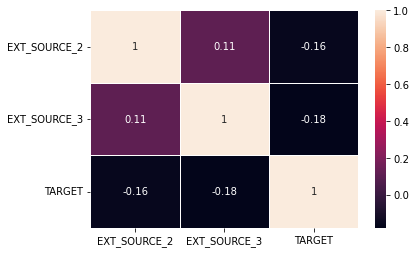

In [31]:
sns.heatmap(corr_ex_score,linewidth = 0.5, annot = True)

### The correlation with these columns are also not that much so we can easily eliminate them from the dataframe

In [32]:
app_flag_rmvd.drop(labels = ['EXT_SOURCE_2','EXT_SOURCE_3'],axis = 1, inplace =True)

In [33]:
len(app_flag_rmvd.columns)

43

# Feature Engineering

In [34]:
updated_df = app_flag_rmvd


In [35]:
pd.DataFrame(updated_df.isnull().sum().sort_values()/updated_df.shape[0])


,0
SK_ID_CURR,0.000000
ORGANIZATION_TYPE,0.000000
LIVE_CITY_NOT_WORK_CITY,0.000000
REG_CITY_NOT_WORK_CITY,0.000000
REG_CITY_NOT_LIVE_CITY,0.000000
LIVE_REGION_NOT_WORK_REGION,0.000000
REG_REGION_NOT_WORK_REGION,0.000000
REG_REGION_NOT_LIVE_REGION,0.000000
HOUR_APPR_PROCESS_START,0.000000
WEEKDAY_APPR_PROCESS_START,0.000000


## Missing Imputation

In [36]:
updated_df.groupby('CNT_FAM_MEMBERS').size()

CNT_FAM_MEMBERS
1.0      67847
2.0     158357
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
11.0         1
12.0         2
13.0         1
14.0         2
15.0         1
16.0         2
20.0         2
dtype: int64

In [37]:
mode_CNT_FAM_MEMBERS = updated_df['CNT_FAM_MEMBERS'].mode()[0]

In [38]:
mode_CNT_FAM_MEMBERS

2.0

In [39]:
updated_df['CNT_FAM_MEMBERS'].fillna(mode_CNT_FAM_MEMBERS, inplace = True)

In [40]:
updated_df['CNT_FAM_MEMBERS'].isnull().sum()

0

In [41]:
updated_df.groupby(['OCCUPATION_TYPE']).size().sort_values()

OCCUPATION_TYPE
IT staff                   526
HR staff                   563
Realty agents              751
Secretaries               1305
Waiters/barmen staff      1348
Low-skill Laborers        2093
Private service staff     2652
Cleaning staff            4653
Cooking staff             5946
Security staff            6721
Medicine staff            8537
Accountants               9813
High skill tech staff    11380
Drivers                  18603
Managers                 21371
Core staff               27570
Sales staff              32102
Laborers                 55186
dtype: int64

In [42]:
mode_OCCUPATION_TYPE = updated_df['OCCUPATION_TYPE'].mode()[0]

In [43]:
updated_df['CNT_FAM_MEMBERS'].fillna(mode_OCCUPATION_TYPE, inplace = True)

In [44]:
updated_df['NAME_TYPE_SUITE'].isnull().sum()

1292

In [45]:
updated_df['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [46]:
updated_df['NAME_TYPE_SUITE'].fillna(updated_df['NAME_TYPE_SUITE'].mode()[0], inplace = True)

In [47]:
updated_df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

### mean and 50% are nearly equal so we can use the mean value to fill the missing values 

In [48]:
updated_df['AMT_ANNUITY'].fillna(updated_df['AMT_ANNUITY'].mean(), inplace= True)

In [49]:
updated_df['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [50]:
updated_df['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

### As the values are the full number so we should go with mode rather than mean

In [51]:
amt_req_col = []
 

for col in updated_df.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_req_col.append(col)
amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [52]:
for col in amt_req_col:
    updated_df[col].fillna(updated_df[col].median(), inplace=True)

In [53]:
updated_df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [54]:
updated_df['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([0., 1., 2., 3., 4.])

## Value Modification

In [55]:
updated_df["AMT_GOODS_PRICE"].isnull().sum()

278

In [56]:
updated_df["AMT_GOODS_PRICE"].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [57]:
updated_df["AMT_GOODS_PRICE"].mean()

538396.2074288895

In [58]:
updated_df["AMT_GOODS_PRICE"].fillna(updated_df["AMT_GOODS_PRICE"].median(),inplace = True)

In [59]:
updated_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
day_col = []
 

for col in updated_df.columns:
    if col.startswith("DAYS"):
        day_col.append(col)
day_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [61]:
for col in day_col:
    updated_df[col] = abs(updated_df[col])

In [62]:
updated_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [64]:
updated_df.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

## Outlier detection and its treatment

In [65]:
updated_df['AMT_GOODS_PRICE'].agg(['max','min','median'])

max       4050000.0
min         40500.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

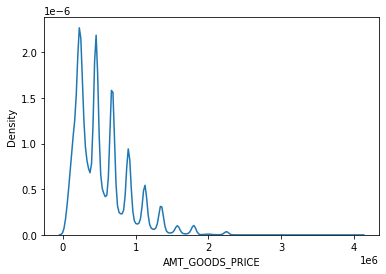

In [66]:
sns.kdeplot(data = updated_df,  x= 'AMT_GOODS_PRICE')

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

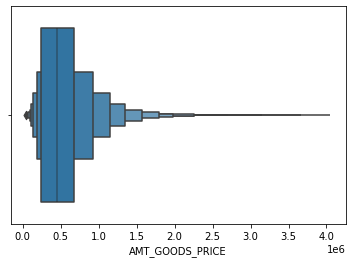

In [67]:
sns.boxenplot(data = updated_df,  x= 'AMT_GOODS_PRICE')


In [68]:
updated_df['AMT_GOODS_PRICE'].quantile([0.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]) 

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

### We are going to create some bins

In [69]:
bins = [0,100,200,300,400,500,600,700,800,900,4050000]

In [70]:
bins = [i * 1000 for i in bins]

In [71]:
bins

[0,
 100000,
 200000,
 300000,
 400000,
 500000,
 600000,
 700000,
 800000,
 900000,
 4050000000]

In [72]:
ranges = ['0-100K','100K-200K','200K-300K','300K-400K','400K-500K', '500K-600K','600K-700K','700K-800K','800K-900K','Above 900K']
updated_df['AMT_GOODS_PRICE_RANGE'] = pd.cut(updated_df['AMT_GOODS_PRICE'], bins, labels = ranges)

In [73]:

updated_df.groupby(['AMT_GOODS_PRICE_RANGE']).size()

AMT_GOODS_PRICE_RANGE
0-100K         8709
100K-200K     32956
200K-300K     62761
300K-400K     21219
400K-500K     57251
500K-600K     13117
600K-700K     40024
700K-800K      8110
800K-900K     21484
Above 900K    41880
dtype: int64

In [74]:
updated_df['AMT_INCOME_TOTAL'].quantile([0.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]) 

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [75]:
bins = [0, 100000, 150000,200000,250000,300000,350000,400000,472500]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K', '300K-350K','350K-400K', 'Above 400K']
updated_df['AMT_INCOME_TOTAL_RANGE'] = pd.cut(updated_df['AMT_INCOME_TOTAL'], bins, labels = ranges)

In [76]:
updated_df.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0-100K        63698
100K-150K     91591
150K-200K     64307
200K-250K     48137
250K-300K     17039
300K-350K      8874
350K-400K      5802
Above 400K     5049
dtype: int64

In [77]:
updated_df['AMT_CREDIT'].quantile([0.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]) 

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [78]:
bins = [0, 200000, 400000,600000,800000,900000,1000000,1854000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K', '900K-1000K', 'Above 1000K']
updated_df['AMT_CREDIT_RANGE'] = pd.cut(updated_df['AMT_CREDIT'], bins, labels = ranges)

In [79]:
updated_df.groupby(['AMT_CREDIT_RANGE']).size()

AMT_CREDIT_RANGE
0-200K         36144
200K-400K      81151
400K-600K      66270
600K-800K      43242
800K-900K      21792
900K-1000K      8927
Above 1000K    46910
dtype: int64

In [80]:
updated_df['AMT_ANNUITY'].quantile([0.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]) 

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [81]:
bins = [0, 15000, 20000,25000,30000,35000,40000,45000,50000,80000, 270006]
ranges = ['0-15K','15K-20K','20K-25K','25K-30K','30K-35K', '35K-40K','40K-45K','45K - 50K', '50K - 80K', 'Above 80K']
updated_df['AMT_ANNUITY_RANGE'] = pd.cut(updated_df['AMT_ANNUITY'], bins, labels = ranges)

In [82]:
updated_df.groupby(['AMT_ANNUITY_RANGE']).size()

AMT_ANNUITY_RANGE
0-15K        63680
15K-20K      42825
20K-25K      48362
25K-30K      44116
30K-35K      33668
35K-40K      24894
40K-45K      16767
45K - 50K    11902
50K - 80K    19774
Above 80K     1523
dtype: int64

In [83]:
updated_df['AMT_INCOME_TOTAL'].quantile([0.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]) 

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [84]:
bins = [0, 100000, 150000,200000,250000,300000,350000,400000,472500]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K', '300K-350K','350K-400K', 'Above 400K']
updated_df['AMT_INCOME_TOTAL_RANGE'] = pd.cut(updated_df['AMT_INCOME_TOTAL'], bins, labels = ranges)

In [85]:
updated_df.groupby(['AMT_CREDIT_RANGE']).size()

AMT_CREDIT_RANGE
0-200K         36144
200K-400K      81151
400K-600K      66270
600K-800K      43242
800K-900K      21792
900K-1000K      8927
Above 1000K    46910
dtype: int64

In [86]:
updated_df['DAYS_EMPLOYED'].quantile([0.1,.2,.3,.4,.5,.6,.7,0.75,0.78,0.8,0.85]) 

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.75      5707.0
0.78      7354.0
0.80      9188.0
0.85    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [87]:
bins = [0,500,1000,2000,3000,4000,5000,6000,7000,8000,9000,365243]
ranges = ['0 - 5Y','5Y - 10Y','']

# Data analysis

In [88]:
updated_df.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
dtype: int64

In [89]:
obj_cols = updated_df.select_dtypes(include=['object']).columns.tolist()

In [90]:
obj_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [91]:
updated_df.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

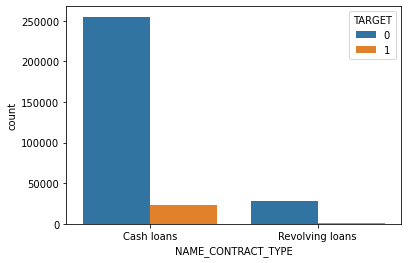

In [92]:
sns.countplot(data = updated_df, x = 'NAME_CONTRACT_TYPE', hue = 'TARGET')

In [93]:
data_pct = updated_df[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()

In [94]:
data_pct

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


In [95]:
data_pct['PCT'] = data_pct["TARGET"]*100

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

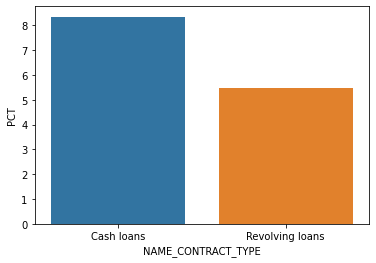

In [96]:
sns.barplot(data = data_pct, x = 'NAME_CONTRACT_TYPE', y= 'PCT')

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

<Figure size 2016x432 with 0 Axes>

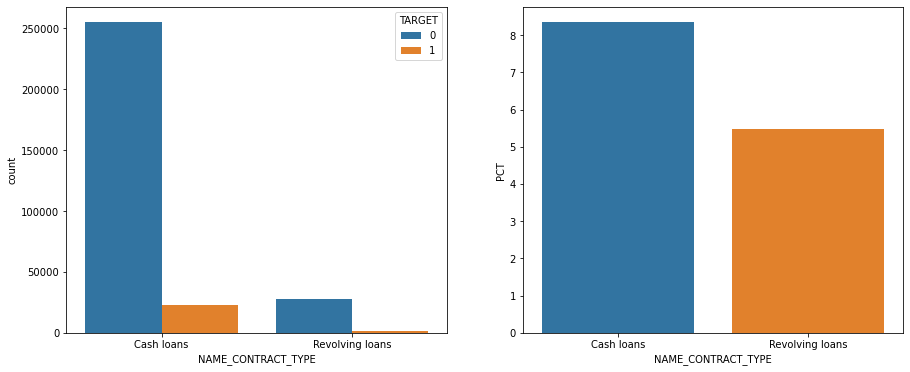

In [97]:
plt.figure(figsize=(28,6))
plt.subplots(1,2,figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data = updated_df, x = 'NAME_CONTRACT_TYPE', hue = 'TARGET')

plt.subplot(1,2,2)
sns.barplot(data = data_pct, x = 'NAME_CONTRACT_TYPE', y= 'PCT')


#### The number of cashloan taker is higher than Revolving loans
`Also the percentage of defaulter is less in cash loan receiver

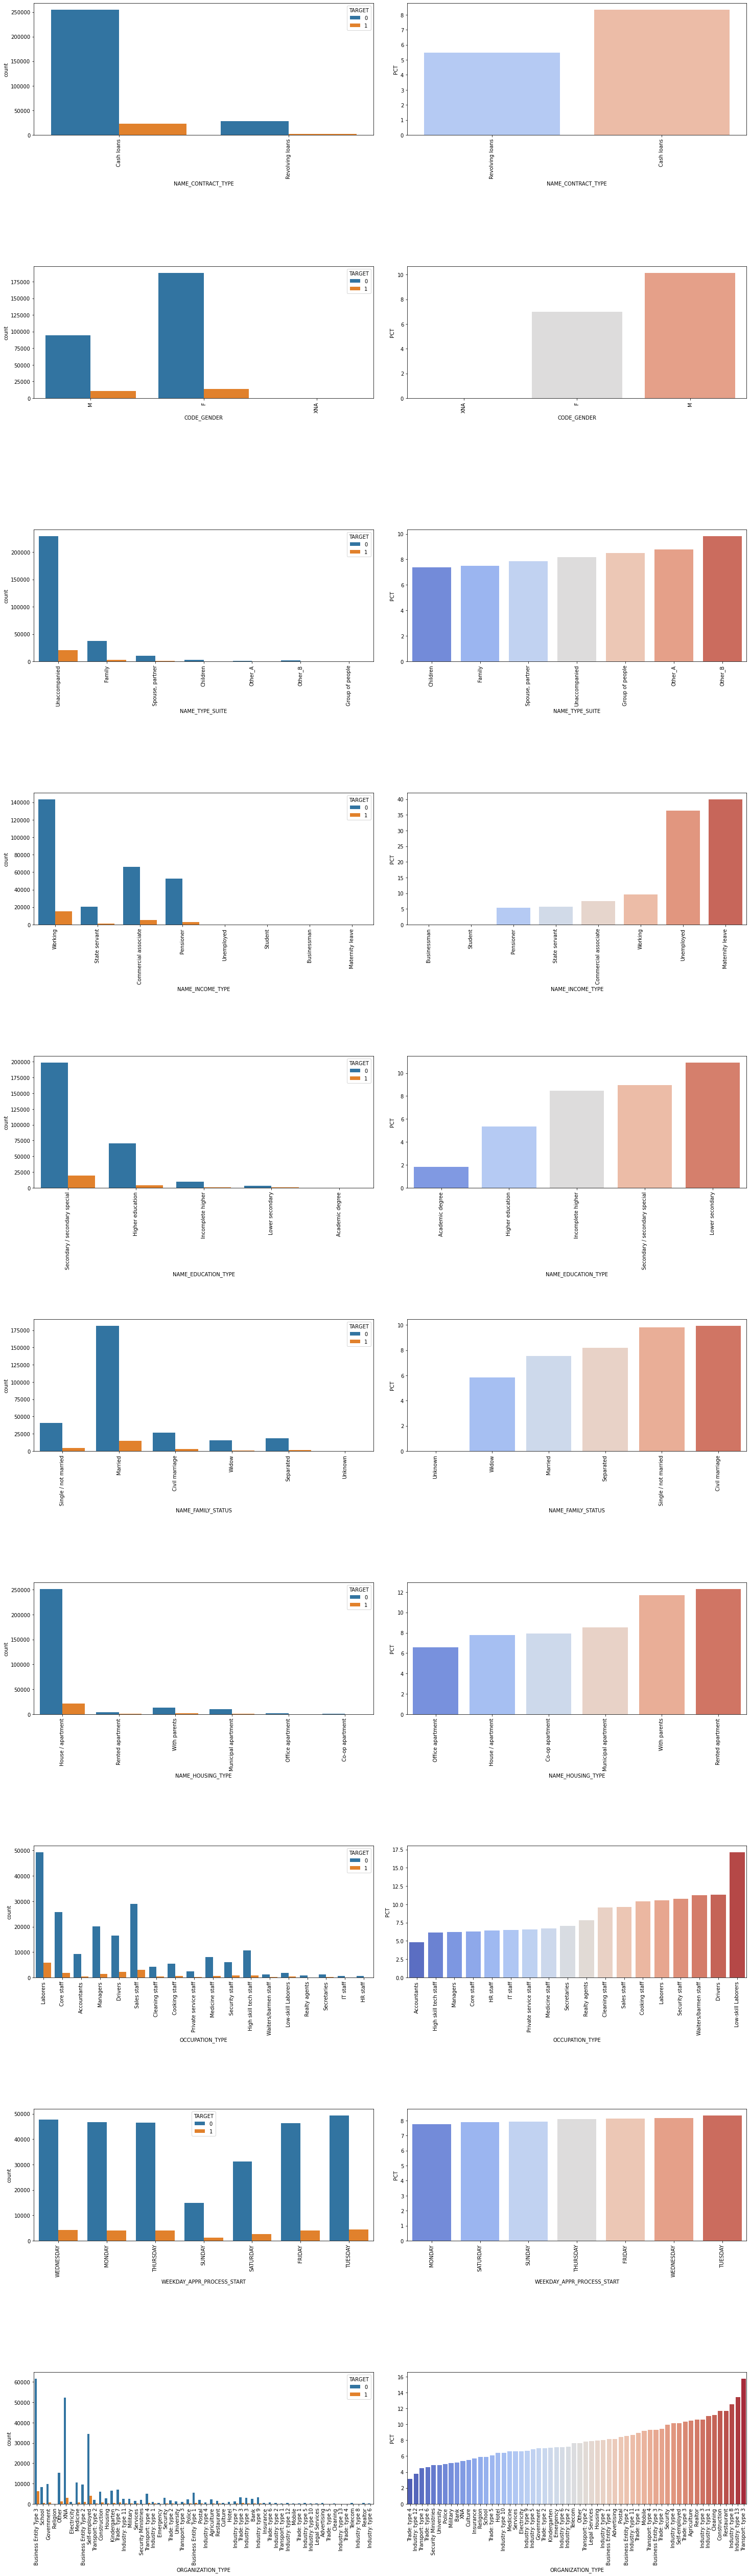

In [98]:
#plt.subplots(10,2,figsize=(20,70))
plt.figure(figsize=(25,90))
for i,col in enumerate(obj_cols):
    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace = 0.1, hspace = 1)
    sns.countplot(data = updated_df, x = col, hue = 'TARGET')
    data_pct = updated_df[[col,'TARGET']].groupby([col],as_index=False).mean().sort_values('TARGET')
    data_pct['PCT'] = data_pct["TARGET"]*100
    plt.xticks(rotation = 90)

    plt.subplot(10,2,i+i+2)
    sns.barplot(data = data_pct, x = col, y= 'PCT',palette = 'coolwarm')
    plt.xticks(rotation = 90)

In [99]:
updated_df.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
dtype: int64

In [175]:
from pandas_profiling import ProfileReport
prof = ProfileReport(updated_df)
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [100]:
num_cols = updated_df.select_dtypes(include = ['float64','int64']).columns
num_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [101]:
num_data = updated_df[num_cols]

In [102]:
num_corr = num_data.corr()
num_corr_unstack = num_corr.where(np.triu(np.ones(num_corr.shape),k = 1).astype(np.bool)).unstack().reset_index().rename(columns = {'level_0': 'var1','level_1':'var2', 0: 'corr'})
num_corr_unstack['corr'] = abs(num_corr_unstack['corr'])
num_corr_unstack = num_corr_unstack.dropna(subset = ['corr']).sort_values(by = ['corr'], ascending = False)
num_corr_unstack.head(15)

C:\Users\krishnendu\AppData\Local\Temp\ipykernel_23432\4034849490.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_corr_unstack = num_corr.where(np.triu(np.ones(num_corr.shape),k = 1).astype(np.bool)).unstack().reset_index().rename(columns = {'level_0': 'var1','level_1':'var2', 0: 'corr'})


,var1,var2,corr
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998490
202,AMT_GOODS_PRICE,AMT_CREDIT,0.986734
475,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950842
398,CNT_FAM_MEMBERS,CNT_CHILDREN,0.879160
611,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.860627
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.860517
713,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.825575
203,AMT_GOODS_PRICE,AMT_ANNUITY,0.774836
169,AMT_ANNUITY,AMT_CREDIT,0.770127
305,DAYS_EMPLOYED,DAYS_BIRTH,0.623941


<AxesSubplot:>

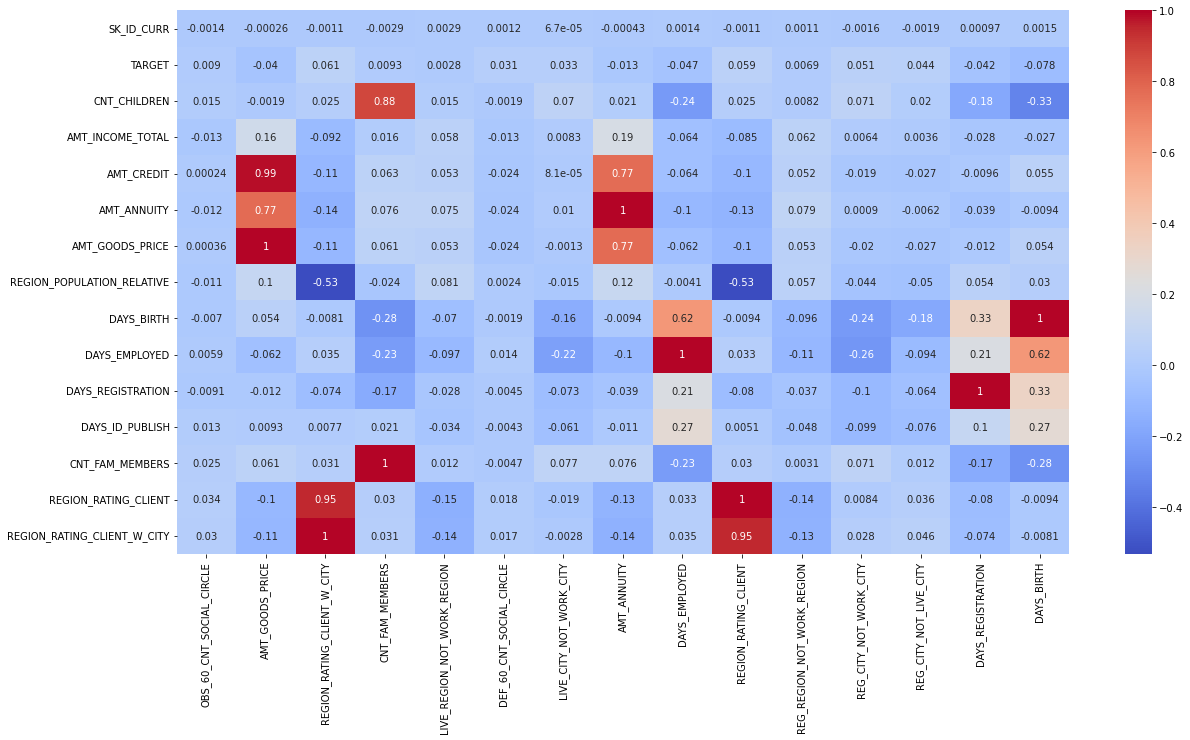

In [103]:
var_cols = num_corr_unstack['var1'].unique().tolist()
heat_map_cols = num_corr[var_cols].iloc[0:15,0:15]
plt.figure(figsize=( 20,10))
sns.heatmap(heat_map_cols,annot = True,cmap = 'coolwarm')

In [104]:
defaulters = num_data[num_data['TARGET'] == 1].drop(['TARGET'],axis = 1)
repayers = num_data[num_data['TARGET'] == 0]

Text(0.5, 1.0, 'boxplots of the dataset')

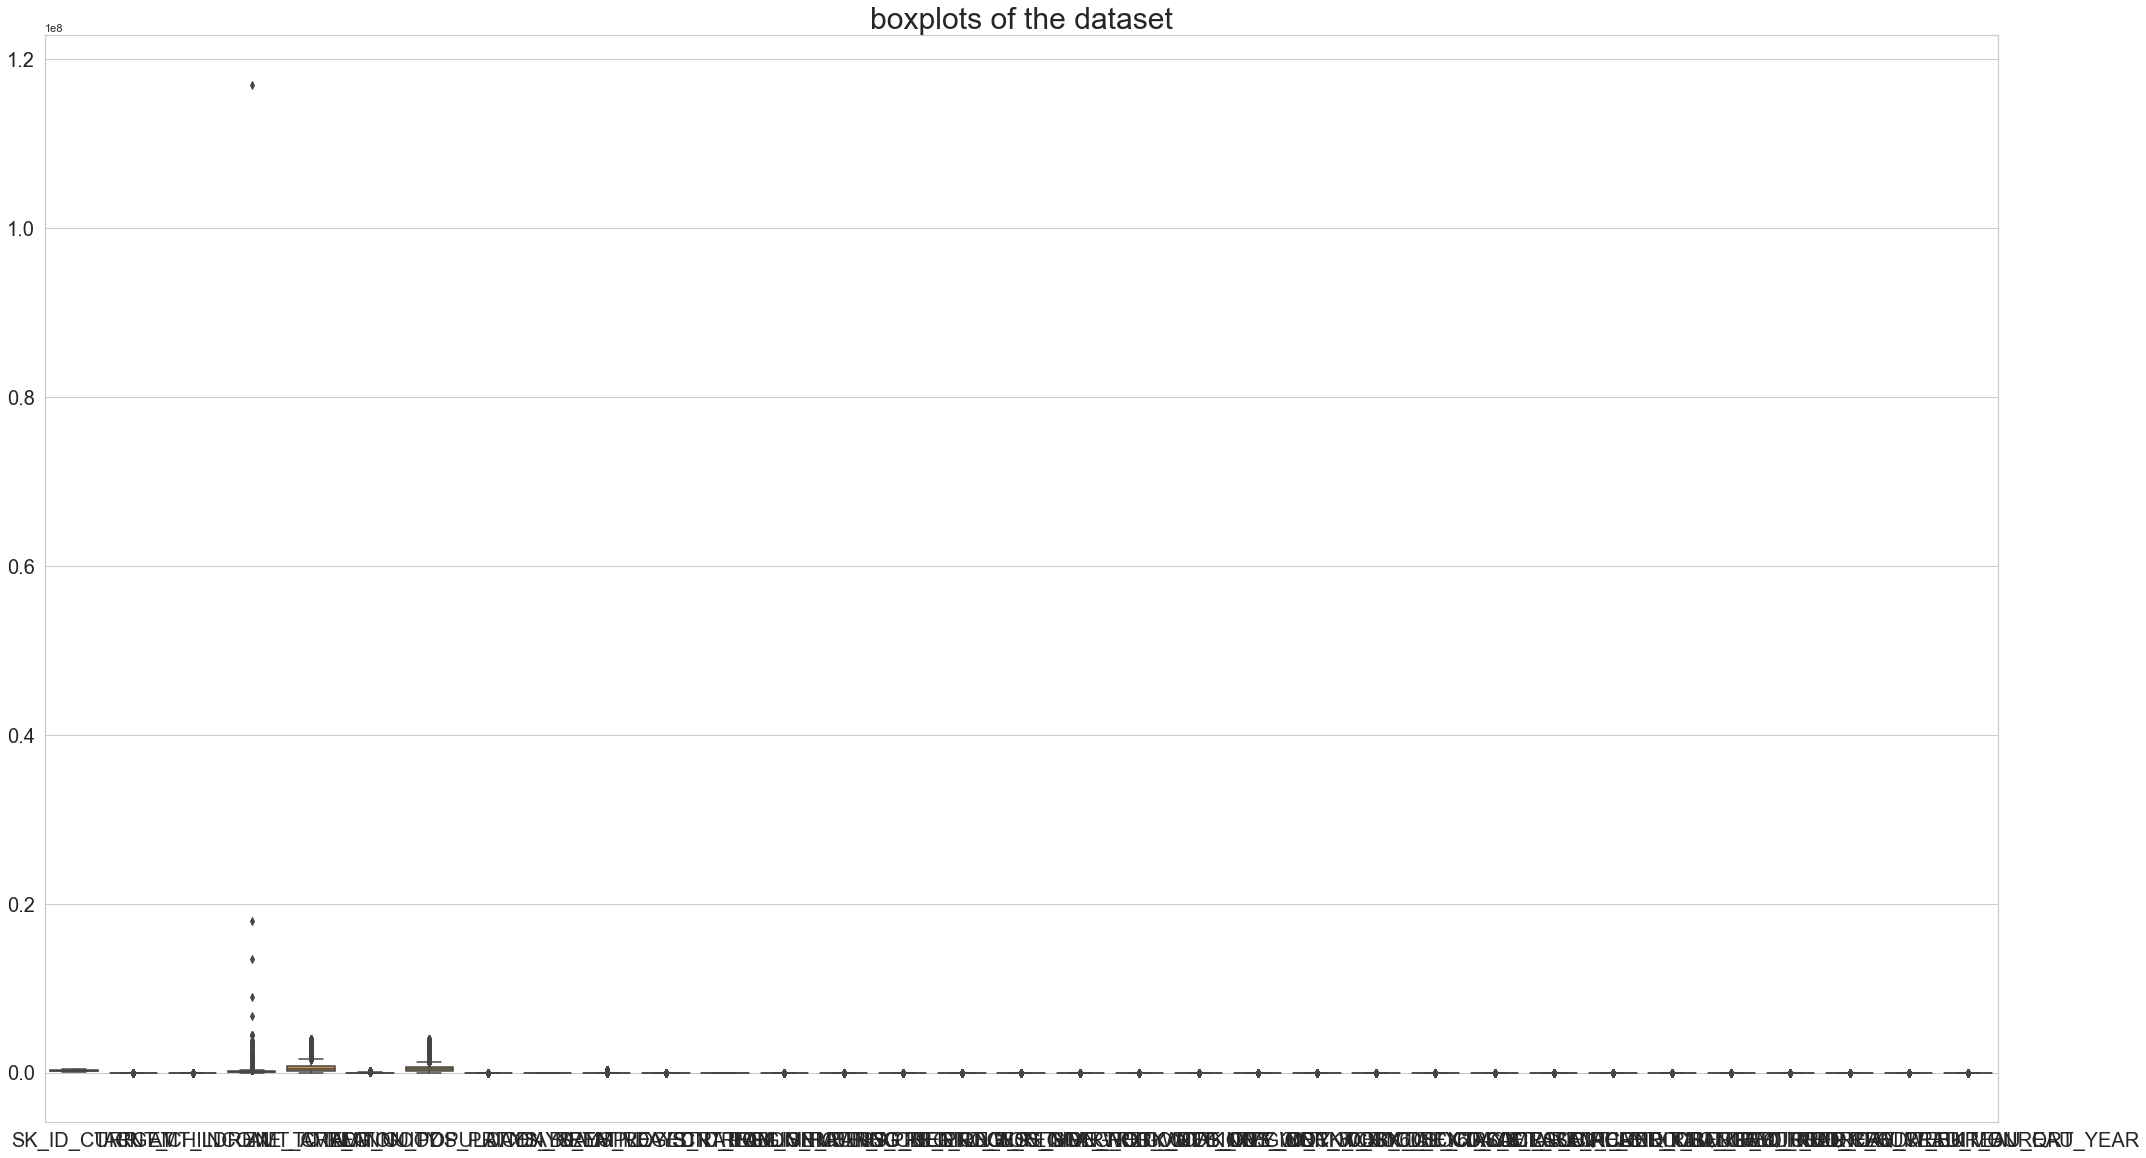

In [173]:
for
sns.set_theme(style="whitegrid")
plt.figure(figsize = (35,20))
ax = sns.boxplot(data = num_data)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
#plt.xlabel('Month',fontsize = 25)
#plt.ylabel('Efluent suspended solids ',fontsize = 25)
plt.title('boxplots of the dataset',fontsize = 30)

In [105]:
defaulters.sample(5)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
154093,278589,0,315000.0,1066320.0,38430.0,900000.0,0.018029,14606,3778,8636.0,...,0.0,3.0,0.0,2277.0,0.0,0.0,0.0,1.0,0.0,1.0
298158,445424,1,90000.0,113760.0,9117.0,90000.0,0.002134,11909,1075,1931.0,...,0.0,5.0,0.0,196.0,0.0,0.0,0.0,0.0,0.0,4.0
189358,319542,0,126000.0,405000.0,27193.5,405000.0,0.026392,9643,643,1118.0,...,0.0,0.0,0.0,1258.0,0.0,0.0,0.0,1.0,0.0,2.0
132251,253391,0,81000.0,112068.0,7488.0,99000.0,0.025164,9557,373,4717.0,...,0.0,0.0,0.0,773.0,0.0,0.0,0.0,0.0,0.0,1.0
195972,327237,1,112500.0,180000.0,9000.0,180000.0,0.009549,9720,732,9659.0,...,0.0,0.0,0.0,128.0,0.0,0.0,0.0,0.0,0.0,2.0


In [106]:
defaulters_corr = defaulters.corr()
defaulters_corr_unstack = defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape),k = 1).astype(np.bool)).unstack().reset_index().rename(columns = {'level_0': 'var1','level_1':'var2', 0: 'corr'})
defaulters_corr_unstack['corr'] = abs(defaulters_corr_unstack['corr'])
defaulters_corr_unstack = defaulters_corr_unstack.dropna(subset = ['corr']).sort_values(by = ['corr'], ascending = False).head(15)
defaulters_corr_unstack

C:\Users\krishnendu\AppData\Local\Temp\ipykernel_23432\4099801287.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  defaulters_corr_unstack = defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape),k = 1).astype(np.bool)).unstack().reset_index().rename(columns = {'level_0': 'var1','level_1':'var2', 0: 'corr'})


,var1,var2,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
163,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
131,AMT_ANNUITY,AMT_CREDIT,0.752195
263,DAYS_EMPLOYED,DAYS_BIRTH,0.582185


<AxesSubplot:>

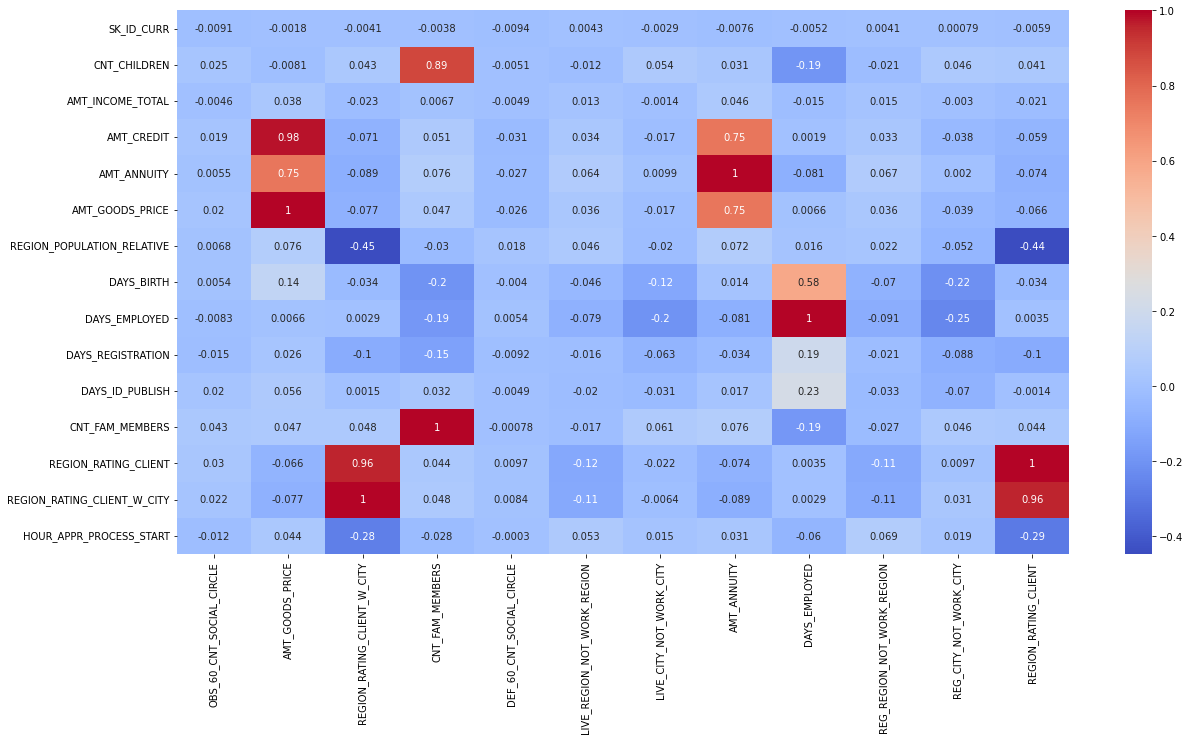

In [107]:
var_cols = defaulters_corr_unstack['var1'].unique().tolist()
heat_map_cols = defaulters_corr[var_cols].iloc[0:15,0:15]
plt.figure(figsize=( 20,10))
sns.heatmap(heat_map_cols,annot = True,cmap = 'coolwarm')

In [108]:
repayers.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,...,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0


In [109]:
repayers_drop_target = repayers.drop(['TARGET'], axis = 1)

In [110]:
repayers_corr = repayers_drop_target.corr()

In [111]:
repayers_corr_unstack = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k= 1).astype(bool)).unstack().reset_index().rename(columns = {'level_0': 'var1','level_1':'var2', 0: 'corr'})
repayers_corr_unstack['corr'] = abs(repayers_corr_unstack['corr'])
repayers_corr_unstack = repayers_corr_unstack.dropna(subset = ['corr']).sort_values(by = ['corr'], ascending = False)
repayers_corr_unstack.head(10)


,var1,var2,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
163,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
131,AMT_ANNUITY,AMT_CREDIT,0.771297
263,DAYS_EMPLOYED,DAYS_BIRTH,0.626114


<AxesSubplot:>

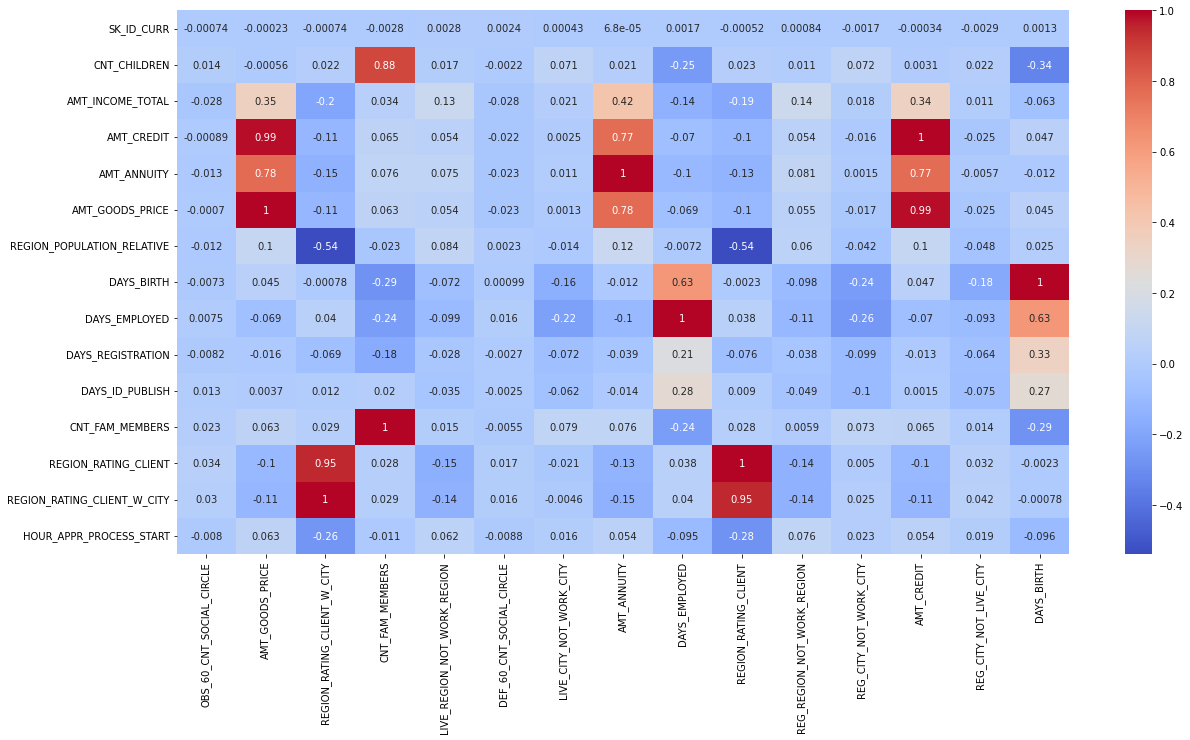

In [112]:
var_cols = repayers_corr_unstack['var1'].unique().tolist()
heat_map_cols = repayers_corr[var_cols].iloc[0:15,0:15]
plt.figure(figsize=( 20,10))
sns.heatmap(heat_map_cols,annot = True,cmap = 'coolwarm')

In [113]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
amt_var_cols =  ["AMT_INCOME_TOTAL",'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

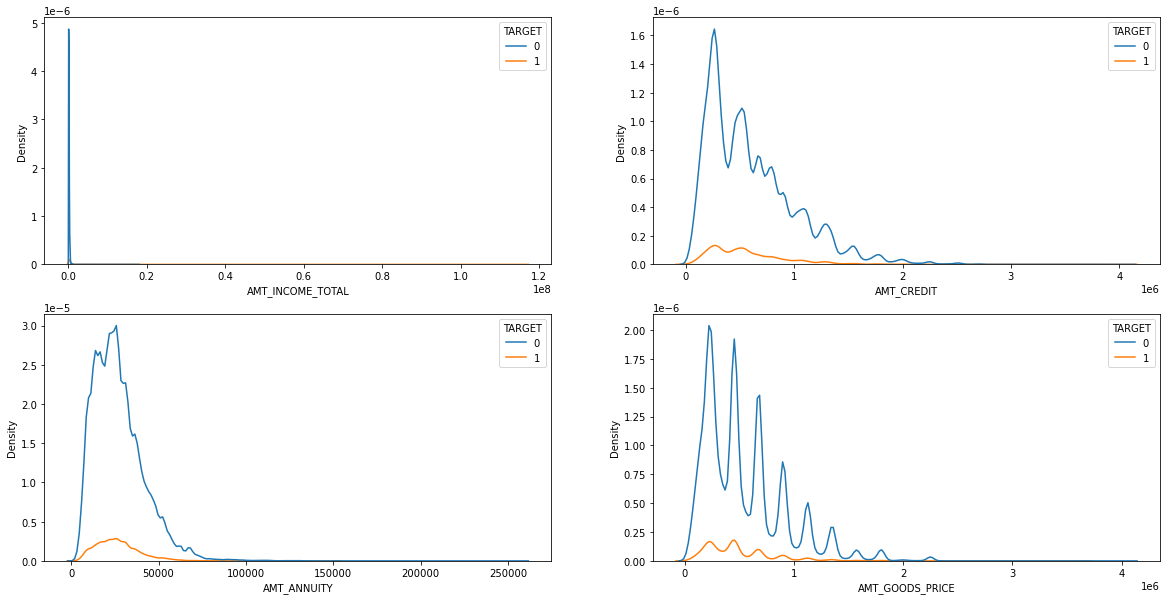

In [115]:
plt.figure(figsize = (20,10))
for i,col in enumerate(amt_var_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data = num_data, x = col, hue = 'TARGET')

## Bivariate Analysis

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

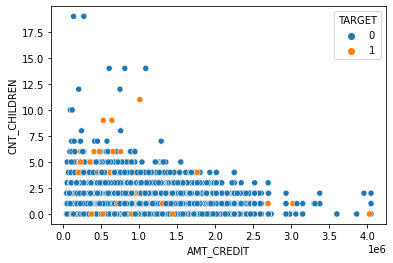

In [116]:
sns.scatterplot(data = num_data, x= 'AMT_CREDIT', y = 'CNT_CHILDREN', hue = 'TARGET' )

In [117]:
amt_var_data = num_data[amt_var_cols+['TARGET']]

In [118]:
amt_var_data.head(5)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET
0,202500.0,406597.5,24700.5,351000.0,1
1,270000.0,1293502.5,35698.5,1129500.0,0
2,67500.0,135000.0,6750.0,135000.0,0
3,135000.0,312682.5,29686.5,297000.0,0
4,121500.0,513000.0,21865.5,513000.0,0


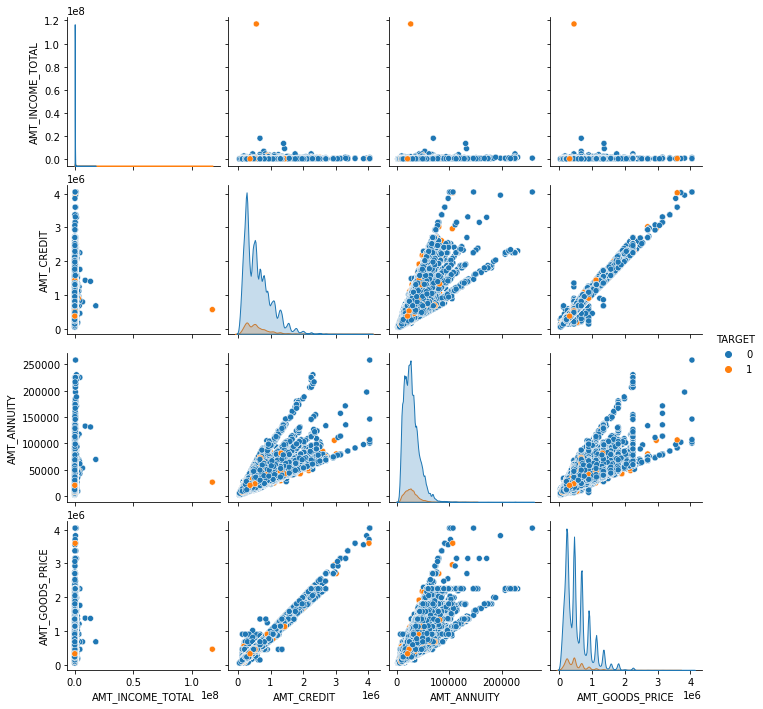

In [121]:
sns.pairplot(data = amt_var_data, hue = 'TARGET')

# Previous application data

In [122]:
prev_app = pd.read_csv('previous_application.csv')

In [123]:
prev_app.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending = False)/prev_app.shape[0] *100).reset_index().rename(columns = {'index' : 'col',0 : 'count_pct'})
null_count.head(15)

,col,count_pct
0,RATE_INTEREST_PRIVILEGED,99.643698
1,RATE_INTEREST_PRIMARY,99.643698
2,AMT_DOWN_PAYMENT,53.636480
3,RATE_DOWN_PAYMENT,53.636480
4,NAME_TYPE_SUITE,49.119754
5,NFLAG_INSURED_ON_APPROVAL,40.298129
6,DAYS_TERMINATION,40.298129
7,DAYS_LAST_DUE,40.298129
8,DAYS_LAST_DUE_1ST_VERSION,40.298129
9,DAYS_FIRST_DUE,40.298129


In [125]:
cols_pct_40 = null_count[null_count['count_pct'] >= 40]['col'].tolist()

In [126]:
cols_pct_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [127]:
nva_cols = cols_pct_40 + ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [128]:
nva_cols

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY']

In [129]:
prev_app_updated = prev_app.drop(labels = nva_cols,axis = 1)

In [130]:
len(prev_app_updated.columns)

22

In [131]:
prev_app_updated.isnull().sum().sort_values(ascending= False)/prev_app_updated.shape[0] *100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [132]:
prev_app_updated['AMT_GOODS_PRICE'].agg(func = ['mean','median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [133]:
prev_app_updated['AMT_GOODS_PRICE_median'] = prev_app_updated['AMT_GOODS_PRICE'].fillna(prev_app_updated['AMT_GOODS_PRICE'].median())

In [134]:
prev_app_updated['AMT_GOODS_PRICE_mean'] = prev_app_updated['AMT_GOODS_PRICE'].fillna(prev_app_updated['AMT_GOODS_PRICE'].mean())

In [135]:
prev_app_updated['AMT_GOODS_PRICE_mode'] = prev_app_updated['AMT_GOODS_PRICE'].fillna(prev_app_updated['AMT_GOODS_PRICE'].mode())

<Figure size 720x432 with 0 Axes>

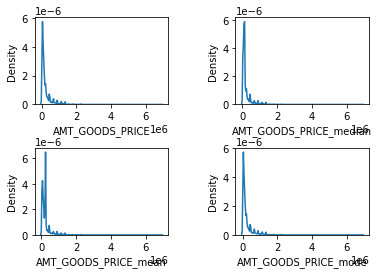

In [136]:
cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean','AMT_GOODS_PRICE_mode']
plt.figure(figsize = (10,6))
plt.subplots(2,2)
for i,col in enumerate(cols):
    
    plt.subplot(2,2,i+1)
    sns.kdeplot(data= prev_app_updated, x = col)
    plt.subplots_adjust(wspace= 0.5, hspace= 0.5)

In [137]:
prev_app_updated['AMT_GOODS_PRICE'].fillna(prev_app_updated['AMT_GOODS_PRICE'].median(), inplace= True)

In [138]:
prev_app_updated['AMT_GOODS_PRICE'].isnull().sum()

0

In [139]:
prev_app_updated['AMT_ANNUITY'].agg(func=['mean','median','max'])

mean       15955.120659
median     11250.000000
max       418058.145000
Name: AMT_ANNUITY, dtype: float64

#### the mean and median are nearly same so we can use any of them to fill the null values

In [140]:
prev_app_updated['AMT_ANNUITY'].fillna(prev_app_updated['AMT_ANNUITY'].median(), inplace = True)

In [141]:
prev_app_updated['PRODUCT_COMBINATION'].unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

In [142]:
prev_app_updated['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [143]:
prev_app_updated['PRODUCT_COMBINATION'].fillna(prev_app_updated['PRODUCT_COMBINATION'].mode()[0], inplace = True)

In [144]:
prev_app_updated['PRODUCT_COMBINATION'].isnull().sum()

0

In [145]:
prev_app_updated['CNT_PAYMENT'].agg(func=['mean','median','max'])

mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

In [146]:
prev_app_updated[prev_app_updated['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending = False)

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [147]:
prev_app_updated['CNT_PAYMENT'].fillna(0, inplace=True)

In [148]:
prev_app_updated.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE                0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
AMT_GOODS_PRICE_median         0
AMT_GOODS_PRICE_mean           0
AMT_GOODS_PRICE_mode      385515
dtype: int64

In [149]:
prev_app_updated.drop(labels = ['AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean','AMT_GOODS_PRICE_mode'], axis = 1, inplace = True)

In [150]:
merged_df = pd.merge(updated_df,prev_app_updated, how = 'inner',on = 'SK_ID_CURR')

In [151]:
merged_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
5,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low
6,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,0.0,XNA,Card Street
7,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,Repeater,Audio/Video,POS,XNA,Country-wide,8025,Consumer electronics,12.0,high,POS household with interest
8,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell
9,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,high,Cash X-Sell: high


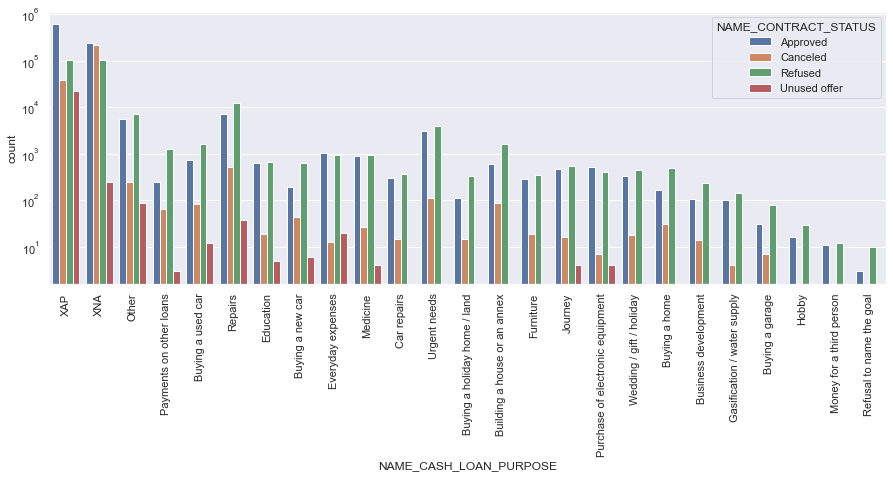

In [188]:
plt.figure(figsize= (15,5))
sns.set_theme(style ='darkgrid')
sns.countplot(merged_df, x= 'NAME_CASH_LOAN_PURPOSE', hue = 'NAME_CONTRACT_STATUS')
plt.xticks(rotation = 90)
plt.yscale('log')

In [153]:
import klib

GridSpec(6, 27)

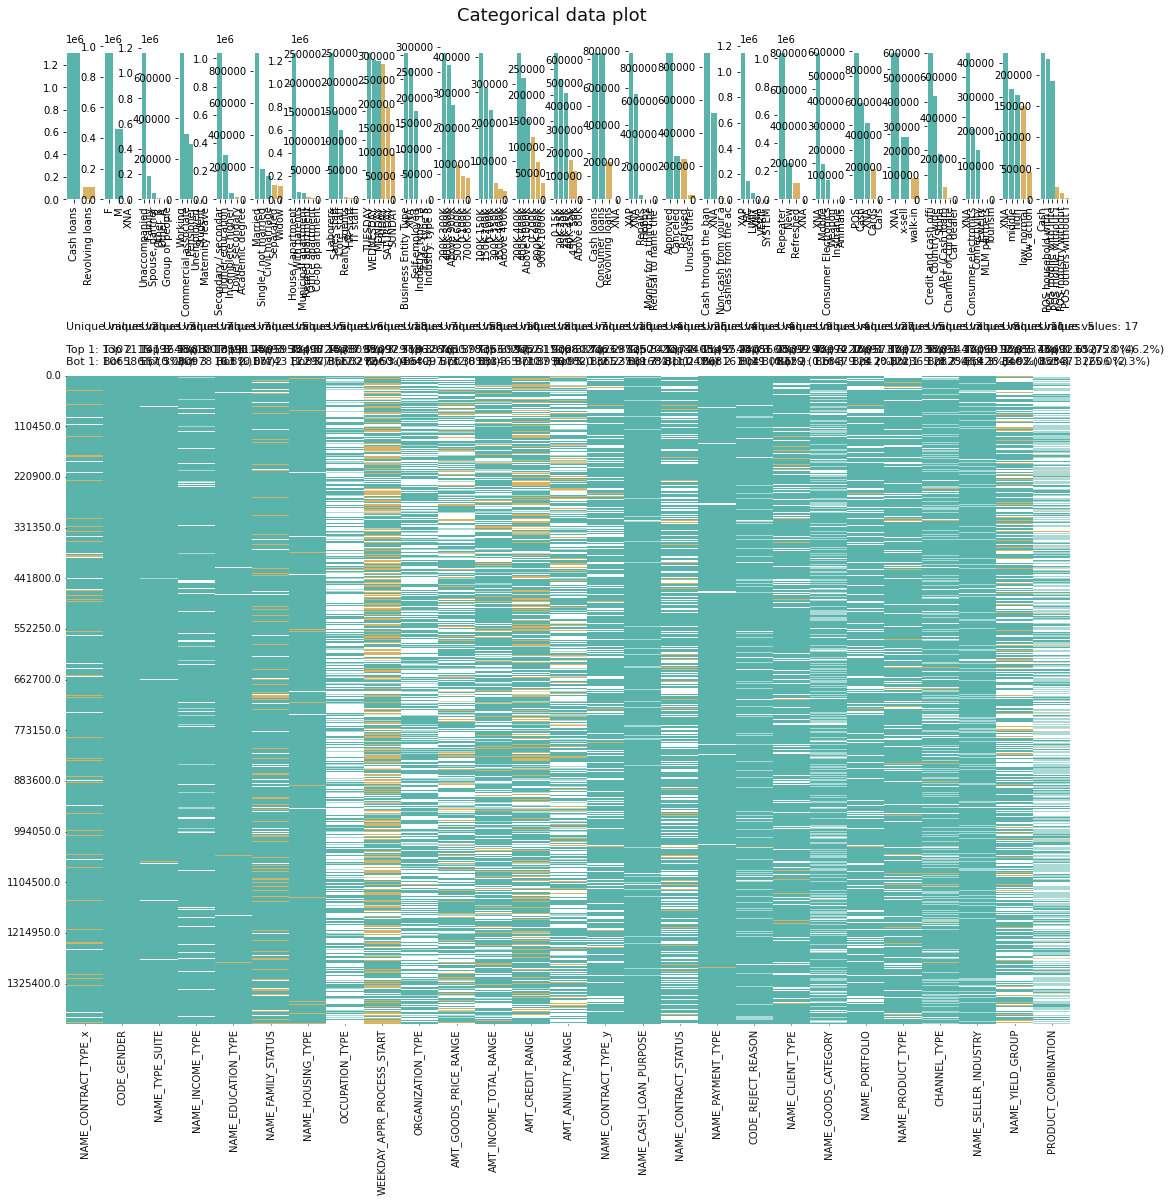

In [171]:
klib.cat_plot(merged_df) # returns a visualization of the number and frequency of categorical features
# returns a distribution plot for every numeric feature

In [174]:
from pandas_profiling import ProfileReport
prof = ProfileReport(merged_df)
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

MemoryError: Unable to allocate 730. MiB for an array with shape (95640271,) and data type int64

In [ ]:
 # returns a color-encoded correlation matrix
klib.corr_plot(merged_df) # returns a color-encoded heatmap, ideal for correlations
klib.dist_plot(merged_df) 

In [ ]:
klib.corr_mat(merged_df)

In [172]:
cols = app_flag_rmvd.columns.tolist()

In [156]:
app_flag_rmvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   CNT_CHILDREN                 307511 non-null  int64   
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  object  
 10  NAME_INCOME_TYPE             307511 non-null  object  
 11  NAME_EDUCATION_TYPE          307511 non-null  object  
 12  NAME_FAMILY_STATUS           307511 non-null

In [157]:
int_cols = []
cat_cols = []
obj_cols = []
for col in cols:
    if app_flag_rmvd[col].dtype == 'int64' or app_flag_rmvd[col].dtype == 'float64':
        int_cols.append(col)
    elif app_flag_rmvd[col].dtype == 'category':
        cat_cols.append(col)
    else:
        obj_cols.append(col)

In [158]:
print(len(int_cols))
print(len(cat_cols))
print(len(obj_cols))

33
4
10


In [159]:
obj_df = app_flag_rmvd[obj_cols]

In [160]:
obj_df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


<AxesSubplot:>

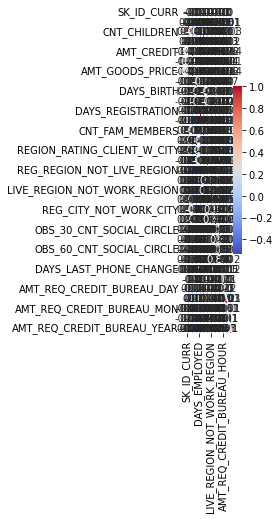

In [161]:
corr_int_cols = round(app_flag_rmvd[int_cols].corr(),2)
plt.figure(figsize = (1,6))
sns.heatmap(corr_int_cols,cmap= 'coolwarm',linewidths=0.5, annot = True)

In [162]:
corr_int_cols

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
TARGET,-0.0,1.00,0.02,-0.00,-0.03,-0.01,-0.04,-0.04,-0.08,-0.05,...,0.03,0.01,0.03,-0.06,-0.00,0.00,-0.00,-0.01,-0.01,0.01
CNT_CHILDREN,-0.0,0.02,1.00,0.01,0.00,0.02,-0.00,-0.03,-0.33,-0.24,...,-0.00,0.02,-0.00,0.01,0.00,0.00,-0.00,-0.01,-0.00,-0.03
AMT_INCOME_TOTAL,-0.0,-0.00,0.01,1.00,0.16,0.19,0.16,0.07,-0.03,-0.06,...,-0.01,-0.01,-0.01,0.02,0.00,0.00,0.00,0.03,0.01,0.02
AMT_CREDIT,-0.0,-0.03,0.00,0.16,1.00,0.77,0.99,0.10,0.06,-0.06,...,-0.02,0.00,-0.02,0.07,-0.00,0.01,0.00,0.06,0.02,-0.04
AMT_ANNUITY,-0.0,-0.01,0.02,0.19,0.77,1.00,0.77,0.12,-0.01,-0.10,...,-0.02,-0.01,-0.02,0.06,0.00,0.00,0.01,0.04,0.01,-0.01
AMT_GOODS_PRICE,-0.0,-0.04,-0.00,0.16,0.99,0.77,1.00,0.10,0.05,-0.06,...,-0.02,0.00,-0.02,0.08,-0.00,0.01,0.00,0.06,0.02,-0.04
REGION_POPULATION_RELATIVE,0.0,-0.04,-0.03,0.07,0.10,0.12,0.10,1.00,0.03,-0.00,...,0.01,-0.01,0.00,0.04,-0.00,0.00,-0.00,0.07,-0.00,-0.00
DAYS_BIRTH,0.0,-0.08,-0.33,-0.03,0.06,-0.01,0.05,0.03,1.00,0.62,...,-0.00,-0.01,-0.00,0.08,-0.00,-0.00,0.00,0.00,0.02,0.07
DAYS_EMPLOYED,0.0,-0.05,-0.24,-0.06,-0.06,-0.10,-0.06,-0.00,0.62,1.00,...,0.02,0.01,0.01,-0.02,-0.00,0.00,0.00,-0.03,0.01,0.05


In [163]:
app.columns.tolist()


['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [164]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [165]:
app[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()


EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [166]:
app.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [167]:
app.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [168]:
!pip install klib

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
import klib

In [170]:
prev_app = pd.read_csv('previous_application.csv')